# Visualize BFS vs DFS (weighted graph)

This notebook builds a small weighted undirected graph, runs BFS and DFS
 (the implementations return (path, total_weight, visit_order)), and visualizes:

- the found path (highlighted edges)

- node visit order (numbers near nodes)


Use the provided `algorithms.bfs` and `algorithms.DFS` implementations.

In [5]:
# Imports and graph construction
import networkx as nx
import matplotlib.pyplot as plt
from algorithms.BFS import bfs
from algorithms.DFS import dfs

# --- Build a weighted undirected graph (8 nodes) ---
G = nx.Graph()
edges = [
    (1, 2, 1.0),
    (1, 3, 1.0),
    (2, 4, 1.5),
    (2, 5, 2.0),
    (3, 6, 1.2),
    (4, 7, 2.5),
    (5, 8, 1.0),
    (6, 8, 1.0),
    (7, 8, 0.8),
    (3, 4, 0.9),
]
G.add_weighted_edges_from(edges)

# fixed layout for reproducible plots
pos = nx.spring_layout(G, seed=42)

# helper to draw graph, highlight a path, and annotate visit order
def draw_graph(G, pos, path=None, visit_order=None, title='', path_color='blue'):
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=900, font_size=12, edge_color='gray')

    # highlight path edges
    if path and len(path) >= 2:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color=path_color, width=3)

    # annotate visit order near nodes (discovery/pop order)
    if visit_order:
        for idx, node in enumerate(visit_order, start=1):
            x, y = pos[node]
            plt.text(x, y + 0.06, str(idx), fontsize=9, ha='center', va='center', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))

    plt.title(title)
    plt.axis('off')
    plt.show()

===== BFS Result =====
Path: [1, 2, 5, 8]
Total weight: 4.0
Visit order (BFS): [1, 2, 3, 4, 5, 6, 7, 8]
===== DFS Result =====
Path: [1, 2, 4, 7, 8]
Total weight: 5.8
Visit order (DFS): [1, 2, 4, 7, 8]


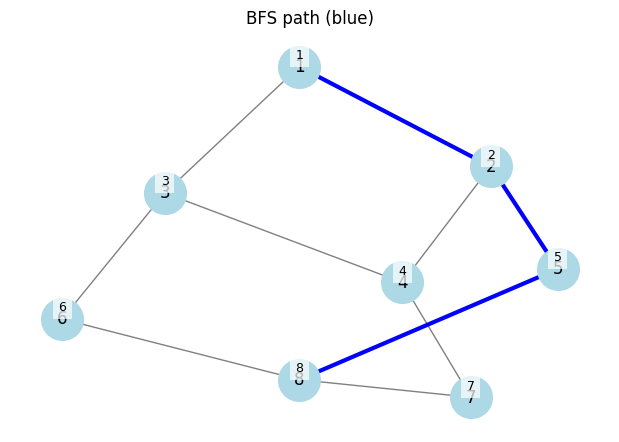

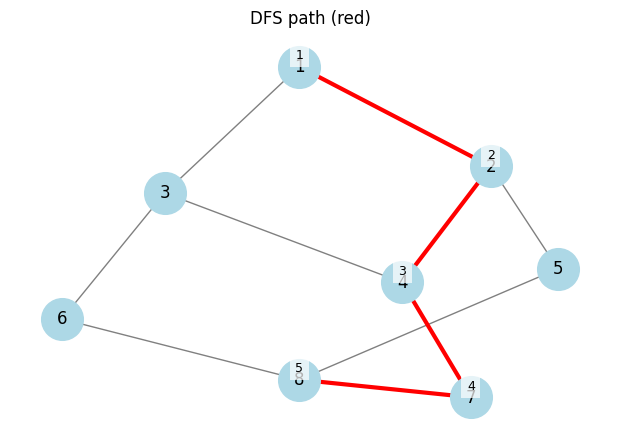

In [6]:
# Run BFS and DFS and visualize results
source_node, target_node = 1, 8

bfs_result = bfs(G, source_node, target_node)
dfs_result = dfs(G, source_node, target_node)

def unpack(result):
    if result is None:
        return None, None, None
    # support both (path, length) and (path, length, order)
    if len(result) == 2:
        return result[0], result[1], None
    return result[0], result[1], result[2]

b_path, b_weight, b_order = unpack(bfs_result)
d_path, d_weight, d_order = unpack(dfs_result)

print('===== BFS Result =====')
if b_path is not None:
    print('Path:', b_path)
    print('Total weight:', b_weight)
    print('Visit order (BFS):', b_order)
else:
    print(f'No path {source_node} -> {target_node}')

print('===== DFS Result =====')
if d_path is not None:
    print('Path:', d_path)
    print('Total weight:', d_weight)
    print('Visit order (DFS):', d_order)
else:
    print(f'No path {source_node} -> {target_node}')

# Visualize BFS result
if b_path is not None:
    draw_graph(G, pos, path=b_path, visit_order=b_order, title='BFS path (blue)', path_color='blue')

# Visualize DFS result
if d_path is not None:
    draw_graph(G, pos, path=d_path, visit_order=d_order, title='DFS path (red)', path_color='red')